# Titanic: Machine Learning from Disaster

In this tutorial, I would explain how to build a basic ML model to predict whether a particular passenger in Titanic ship would survive or not based on their profile.
We will go through how to load data sets, visualise to have a better understanding of our data to choose relevant features for the model, and build a complete ML model (Random forest) to predict the label of passengers (survived or not survived).

Let's get started!!!

First of all, we need to import proper libraries. As the data we have are stored in the CSV files, **pandas** library is the most powerful library supporting data manipulating in the data frame type.

We also use **matplotlib** package for visualisation.

We also need packages and libraries to build machine learning models and evaluate models as well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Basic background in building ML models##
Normally, based on the learning method, there are four types of ML algorithms, including supervised learning, unsupervised learning, semi-supervised learning, and reinforcement learning. This link [https://towardsdatascience.com/types-of-machine-learning-algorithms-you-should-know-953a08248861] contains very useful information about the types of machine learning algorithms.

The Titanic problem is a supervised problem. We already know the (**input** (information of each passenger), **label** (survived/ not survived)) in training data, which is explained later below. What we need to do is to predict the **label** (survived/ not survived) of the passengers based their data in test data. There are only 2 categories in predictions, hence it is a classification problem.


Training data in supervised learning is the data set contains **known** (**input**, **label**), or the sample of data used to fit the model. We use training data to train the model, which means letting the machine "learn".

We use testing data to evaluate the complete model. So they are the sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. 

The good practice is to introduce the validation data, which is used to evaluate a given model, but this is for frequent evaluation. General speaking, this data is to tune the parameters and weights to have the best fit model, then we evaluate the final model with test data.

For more information, please have a look at this link: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

As such, building a supervised ML model means we apply ML algorithm that allows the machine to learn how to fit the training data, and give the best predictions. 

## Data Visualisation and Manipulation

Now we want to look at the train data to know which information and data types we have.

In [2]:
# Read train data 
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In this table, information about each passenger is stored in each row.

The label of data is stored in *Survived* column, in which, 0 presents non-survived when 1 presents survived.

We also have information about their seat classes, names, genders, ages, sibsps, parches, ticket numbers, fares, cabins, embarked. These information are known as the input. 

Some of these inputs are relevant to the passengers' survivals, some are not. We all know that when the ship sank, the children, the older, and women were prioritised to settle in the rescue boats before men. So the features of ages, genders should be included in the model.

We will have a look at the feature of genders first, we want to know the percentage of women/ men that survived compared to the total number of women/ men in the ship.

In [4]:
female_data = train_data.loc[train_data["Sex"] == "female"]["Survived"]
female_survived_rate = sum(female_data) / len(female_data) 

print("% of women who survived:", female_survived_rate * 100)

% of women who survived: 74.20382165605095


In [5]:
male_data = train_data.loc[train_data["Sex"] == "male"]["Survived"]
male_survived_rate = sum(male_data) / len(male_data)

print("% of men who survived:", male_survived_rate * 100)

% of men who survived: 18.890814558058924


As we can see, the % of survived women is 74%, while the figure of men is just 18.8%. We decide to take into account of gender as one of the features in our model.

For better understanding of the data, the good practice is to visualise the relationship among the data.

In [6]:
def visualisation(df, feature_col, survived_col_name="Survived"):

    index_value = df[feature_col].unique().tolist()

    survived = []
    total = []

    for value in index_value:
        col_data = df.loc[df[feature_col] == value][survived_col_name]

        survived.append(sum(col_data))
        total.append(len(col_data))

    new_df = pd.DataFrame({"survived": survived, "total": total}, index=index_value)
    
    new_df.plot.bar(rot=0)
    
    plt.title("Survived and total number of passengers by " + feature_col)
    plt.show()

We can see that, the Passenger ID, name, and tickets are not so relevant to the survival of passenger. The fare of tickets is corresponding with the their seat classes. We will visualise the features of *Pclass*, *Sex*, *Age*, *SibSP*, *Parch*, *Embarked*. 

We want to group the age data into groups: children (0 - 15), adult (15 - 60), old people (> 60).
We also note that the age data contains NaN value, which can not be inputed in the model, hence we replace all NaN value with the mean value of age, which is 30.

In [7]:
# Replace empty cells in "Age" column 
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

# Make age_group
train_data["age_group"] = pd.cut(train_data["Age"], bins=[-1, 0, 15, 60, 1000], labels=False)
labels = np.array('Children Adult Old'.split())

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,2


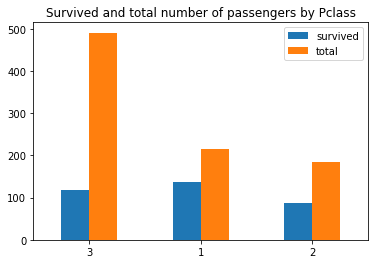

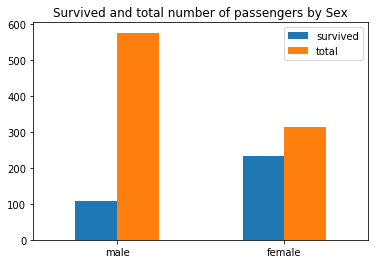

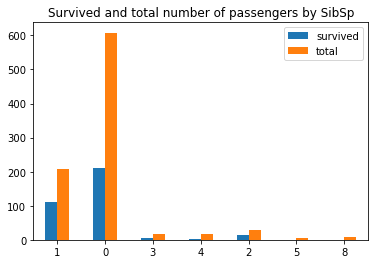

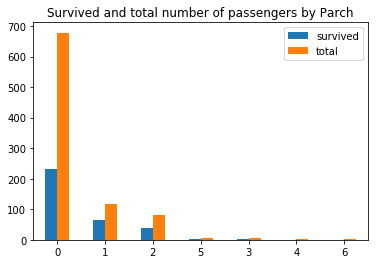

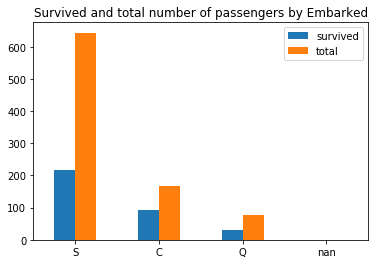

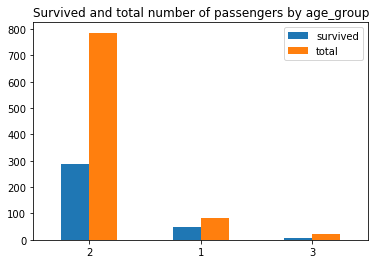

In [8]:
features_vis = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "age_group"]

for feature in features_vis:
    visualisation(train_data, feature)

From the graphs, we can see those features have impacts to the probability of passenger surviving or not.
Hence, we decide to take these features into account to build our model.

## Building model

As we discussed above, we need 3 types of datasets to build a complete model, which are training , validation, and test data sets. 

We will split the original train_data into training and validation data sets. We build the model, fit this model with train data, then evaluate this model with validation data. By evaluating the model with validation data, we are trying to produce the most accurate predictions we can.

Finally, when we have the complete model, we will test the model with test data and submit our answer.

In [9]:
# Split ratio train_data : val_data
split_ratio = 0.8

split_data = np.split(train_data, [int(train_data.shape[0] * 0.8)], axis=0)

train_data_n = split_data[0]
val_data = split_data[1]

In this tutorial, we use Random Forest Algorithm to predict label or classify them as survived or not survived.

Random Forest is a common used algorithm with pros: fast, accurate, and non-overfitting.
https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [10]:
# Import library
from sklearn.ensemble import RandomForestClassifier

# Build model

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Age"]

X = pd.get_dummies(train_data_n[features])
y = train_data_n["Survived"]

model = RandomForestClassifier(n_estimators=400, max_depth=5, random_state=1)
model.fit(X, y)

print(".... Finish training model.")

.... Finish training model.


We have finished training our model. We now need to evaluate this model by validation data.

In [11]:
X_val = pd.get_dummies(val_data[features])
y_val = val_data["Survived"].tolist()

predictions = model.predict(X_val)
pred_list = predictions.tolist()

We will need to know how well our model predicts, the easiest way is to calculate the percentage of accurate predictions.

There are many metrics to evaluate a model, please have a look at: https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226

In [12]:
y_true = []
y_pred = []

accurate_pred = 0
total_pred = 0

for i in range(val_data.shape[0]):
    if pred_list[i] == y_val[i]:
        accurate_pred += 1
    
    total_pred += 1
    
    y_true.append(y_val[i])
    y_pred.append(pred_list[i])

print("The percentage of correct predictions is: ", accurate_pred / total_pred * 100)

The percentage of correct predictions is:  87.70949720670392


We also need to visualise these predictions by confusion matrix. (https://machinelearningmastery.com/confusion-matrix-machine-learning/)

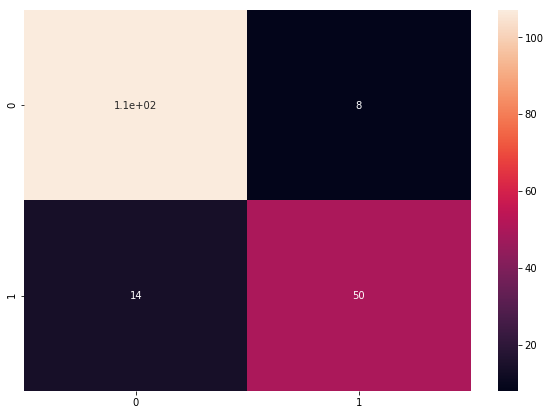

In [13]:
# Import confusion_matrix lib
from sklearn.metrics import confusion_matrix

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Visualise confusion matrix
df_cm = pd.DataFrame(cf_matrix, index = [i for i in range(2)], columns = [i for i in range(2)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

We will need to do feature engineering as well as other techniques and tune parameters to have a better prediction.
These will be found in **models** folder in this repo (under development).
We will accept this result of ~ 87% to move on the next step with testing data.

In [14]:
test_data = pd.read_csv("test.csv")
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [15]:
X_test = pd.get_dummies(test_data[features])
y_test = model.predict(X_test)

predict_data = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test})
predict_data.to_csv('predict.csv', index=False)
print("Your file was successfully saved")
predict_data

Your file was successfully saved


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Now we have successfully built the model that can predict the probability of survival of passengers in Titanic based on their profile using Machine Learning algorithm: Random Forest.

To have a better model, we need to try different algorithms as well as tune parameters for the model. Please visit the **models** folder for more information.
